# 10 minutes to Dask

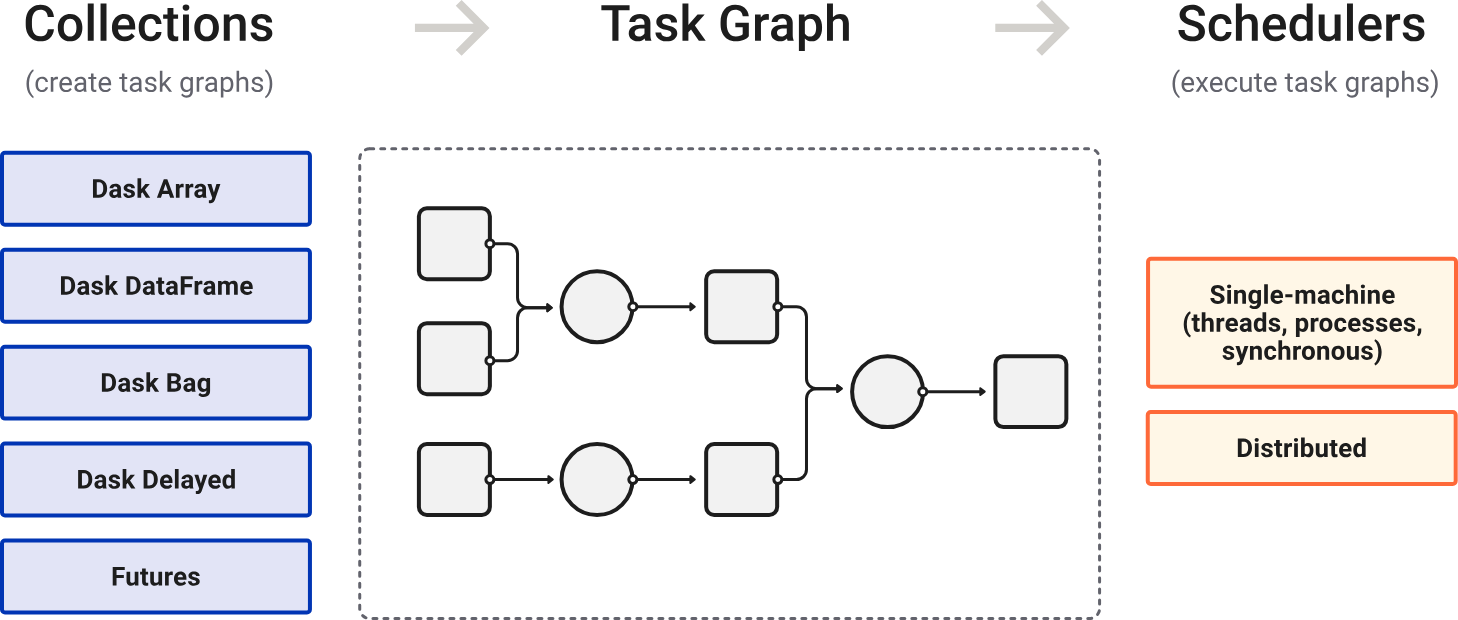

High level collections are used to generate task graphs which can be executed by schedulers on a single machine or a cluster.

In [3]:
# Python deps
import numpy as np
import pandas as pd

# Dask deps
import dask.dataframe as dd
import dask.array as da
import dask.bag as db

# Creating a Dask Object
You can create a Dask object from scratch by supplying existing data and optionally including information about how the chunks should be structured.



In [7]:
# Create a sample pandas dataframe
index = pd.date_range("2021-09-01", periods=2400, freq="1h")
df = pd.DataFrame({"a": np.arange(2400), "b": list("abcaddbe" * 300)}, index=index)
# Render a Dask dataframe from the pandas dataframe; Distribute dataframe accross 10 partitions
ddf = dd.from_pandas(df, npartitions=10)
ddf


,a,b
npartitions=10,,
2021-09-01 00:00:00,int64,string
2021-09-11 00:00:00,...,...
...,...,...
2021-11-30 00:00:00,...,...
2021-12-09 23:00:00,...,...


### See [Dask DataFrame](https://docs.dask.org/en/stable/dataframe.html).

In [11]:
# check the index values covered by each partition
ddf.divisions

(Timestamp('2021-09-01 00:00:00'),
 Timestamp('2021-09-11 00:00:00'),
 Timestamp('2021-09-21 00:00:00'),
 Timestamp('2021-10-01 00:00:00'),
 Timestamp('2021-10-11 00:00:00'),
 Timestamp('2021-10-21 00:00:00'),
 Timestamp('2021-10-31 00:00:00'),
 Timestamp('2021-11-10 00:00:00'),
 Timestamp('2021-11-20 00:00:00'),
 Timestamp('2021-11-30 00:00:00'),
 Timestamp('2021-12-09 23:00:00'))

^Dataframe is partitioned accross 10 timestamps

In [12]:
# access a particular partition
ddf.partitions[1]

,a,b
npartitions=1,,
2021-09-11,int64,string
2021-09-21,...,...
